<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20 ,random_state=13)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [3]:
X_train.shape,y_train.shape

((80, 1), (80,))

In [4]:
X_test.shape,y_test.shape

((20, 1), (20,))

[28.04678526]
-1.7453593543657961


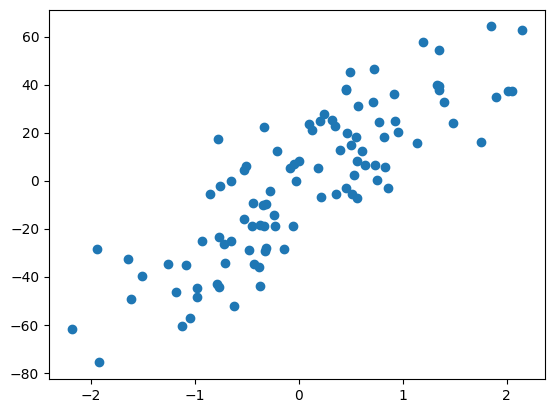

In [5]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
plt.scatter(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+04, tolerance: 7.367e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

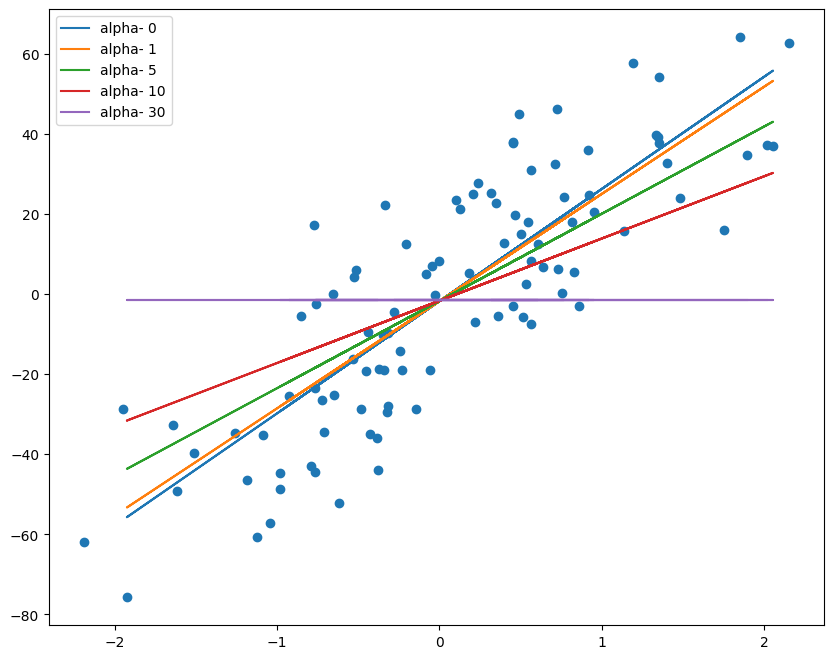

In [6]:
alphas=[0,1,5,10,30]
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    plt.plot(X_test,lasso.predict(X_test),label='alpha- {}'.format(alpha))

plt.legend()
plt.show()

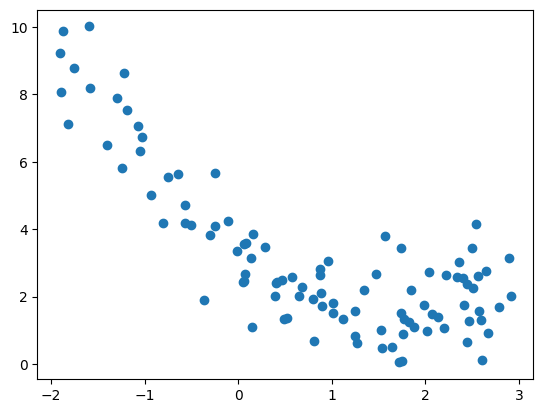

In [7]:
m=100
x1=5*np.random.rand(m,1) - 2
x2=0.7*x1**2 - 2*x1 + 3 + np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.133e+01, tolerance: 5.535e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

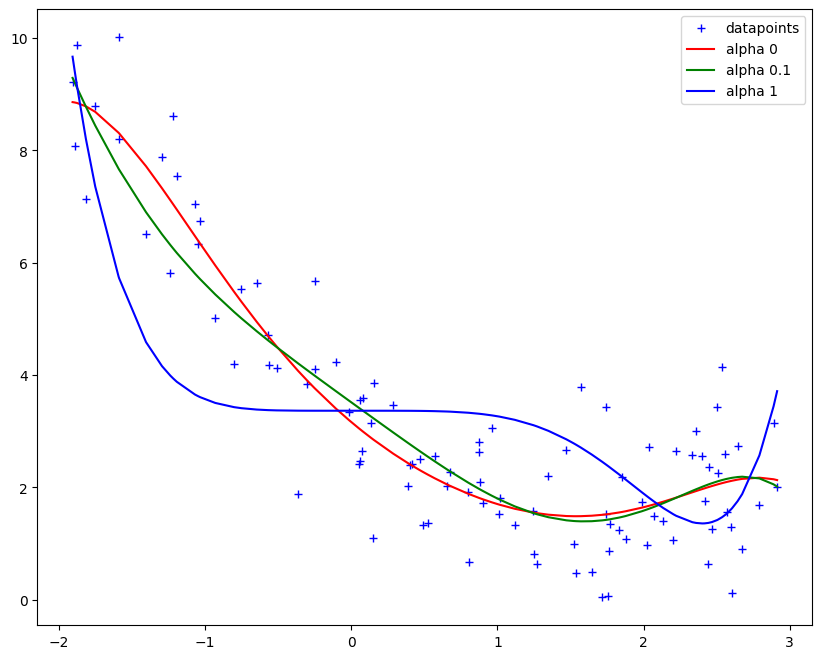

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

def get_preds_lasso(x1,x2, alpha):
    model=Pipeline([
        ('poly',PolynomialFeatures(degree=6)),
        ('lasso',Lasso(alpha=alpha))

    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,0.1,1]
cs=['r','g','b']

plt.figure(figsize=(10,8))
plt.plot(x1,x2,'b+',label='datapoints')

for alpha, c in zip(alphas, cs):
  pred=get_preds_lasso(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),pred[np.argsort(x1[:,0])],c=c ,label='alpha {}'.format(alpha))

plt.legend()
plt.show()



###in the above figure :
- red line shows overfitting
- green line is good
- blue line shows underfitting